#**Perceptron Algortihm**
The perceptron algorithm is a simple but powerful algorithm for supervised learning of binary classifiers. It is a type of neural network model, perhaps the simplest type of neural network model. It consists of a single node or neuron that takes a row of data as input and predicts a class label.

The perceptron algorithm is a linear classification algorithm. This means that it learns a decision boundary that separates two classes using a line (called a hyperplane) in the feature space.

The perceptron algorithm works by iteratively updating a set of weights associated with the input features. The weights are updated in such a way that the perceptron can correctly predict the class label of the training data.

The perceptron algorithm is guaranteed to converge to a solution if the training data is linearly separable, meaning that there exists a hyperplane that can perfectly separate the two classes. However, if the training data is not linearly separable, the perceptron algorithm may not converge to a solution, or it may converge to a solution that does not generalize well to new data.

#**Pseudocode**
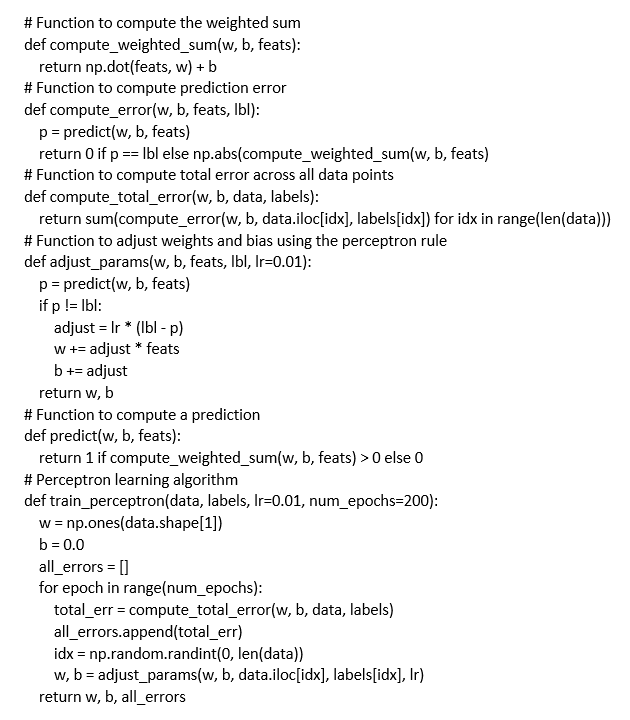

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

data = pd.read_csv('sensor_readings_24.csv')
Last = data.drop('Movement', axis=1)
num = data['Movement']

encoder = LabelEncoder()
numered = encoder.fit_transform(num)

X_train, X_test, y_train, y_test = train_test_split(Last, numered, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(len(np.unique(num)), input_dim=X_train.shape[1], activation='softmax'))  # Modificado aquí

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=26, batch_size=32)

Prediction = np.argmax(model.predict(X_test), axis=-1)

print("Accuracy: ", accuracy_score(y_test, Prediction))
print("Precision: ", precision_score(y_test, Prediction, average='macro'))
print("Recall: ", recall_score(y_test, Prediction, average='macro'))
print("F1 Score: ", f1_score(y_test, Prediction, average='macro'))



Epoch 1/26
137/137 [==============================] - 1s 5ms/step - loss: 2.9940 - accuracy: 0.2690 - val_loss: 1.6419 - val_accuracy: 0.4231
Epoch 2/26
137/137 [==============================] - 1s 5ms/step - loss: 1.4542 - accuracy: 0.4647 - val_loss: 1.3217 - val_accuracy: 0.5220
Epoch 3/26
137/137 [==============================] - 0s 4ms/step - loss: 1.2208 - accuracy: 0.5300 - val_loss: 1.1703 - val_accuracy: 0.5403
Epoch 4/26
137/137 [==============================] - 1s 4ms/step - loss: 1.0836 - accuracy: 0.5736 - val_loss: 1.0484 - val_accuracy: 0.5696
Epoch 5/26
137/137 [==============================] - 1s 5ms/step - loss: 0.9943 - accuracy: 0.5940 - val_loss: 0.9818 - val_accuracy: 0.5696
Epoch 6/26
137/137 [==============================] - 0s 3ms/step - loss: 0.9302 - accuracy: 0.6040 - val_loss: 0.9311 - val_accuracy: 0.5870
Epoch 7/26
137/137 [==============================] - 0s 3ms/step - loss: 0.8837 - accuracy: 0.6116 - val_loss: 0.8966 - val_accuracy: 0.6053
Epoch 

This line defines the loss function and the optimizer:

model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])


The sparse_categorical_crossentropy loss function is used in multi-class classification problems and is particularly helpful when the labels are integers, representing class indices. This loss function measures the difference between the predicted probability distribution and the actual class, aiming to minimize this difference. It's a more memory-efficient alternative to the standard categorical crossentropy loss function, especially beneficial for problems with a large number of classes. The loss is calculated using the negative log probability of the true class, aiming to increase the model's predicted probability for the correct class during the training process.


The RMSprop optimizer is an adaptive learning rate method introduced to combat the issues of diminishing or exploding gradients in neural network training. It adjusts the learning rate for each parameter individually by computing a moving average of the squares of gradients, leading to faster convergence and increased stability during training, especially in complex, non-convex optimization landscapes.
